## Data Preprocessing

### Importing the libraries

In [95]:
import numpy as np
import pandas as pd

### Importing the dataset

In [96]:
dataset = pd.read_csv('dataset.csv', sep=";")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Delete no SIN cities

X = np.delete(X, [8, 20, 25], 1)

### Encoding cyclical continuous features


#### Months

In [97]:
months_in_year = 12
months = X[:, 1]

sin_month = np.sin(2*np.pi*months/months_in_year)
cos_month = np.cos(2*np.pi*months/months_in_year)

# remove month original collumn
X = np.delete(X, 1, 1)

# insert new collums features
X = np.insert(X, 1, sin_month, 1)
X = np.insert(X, 2, cos_month, 1)

#### hours

In [98]:
hours_in_day = 24
hours = X[:, 4]

sin_hour = np.sin(2*np.pi*hours/hours_in_day)
cos_hour = np.cos(2*np.pi*hours/hours_in_day)

# remove month original collumn
X = np.delete(X, 4, 1)

# insert new collums features
X = np.insert(X, 4, sin_hour, 1)
X = np.insert(X, 5, cos_hour, 1)

#### weekdays

In [99]:
number_of_weekdays = 7
weekdays = X[:, 6]

sin_weekdays = np.sin(2*np.pi*weekdays/number_of_weekdays)
cos_weekdays = np.cos(2*np.pi*weekdays/number_of_weekdays)

# remove month original collumn
X = np.delete(X, 6, 1)

# insert new collums features
X = np.insert(X, 6, sin_weekdays, 1)
X = np.insert(X, 7, cos_weekdays, 1)

In [100]:
dataset

,Anos após 2000,Mês do Ano,Dia do Mês,Hora do dia,Dia da Semana,Feriado,temp-go.csv,temp-to.csv,temp-am.csv,temp-df.csv,...,temp-pb.csv,temp-mt.csv,temp-es.csv,temp-ba.csv,temp-ap.csv,temp-pr.csv,temp-sc.csv,temp-se.csv,temp-ma.csv,Carga
0,3,5,1,0,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,40.88700
1,3,5,1,1,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,38.20500
2,3,5,1,2,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,35.06800
3,3,5,1,3,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,33.98700
4,3,5,1,4,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,33.56600
5,3,5,1,5,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,33.16000
6,3,5,1,6,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,32.73800
7,3,5,1,7,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,31.14600
8,3,5,1,8,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,30.64600
9,3,5,1,9,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,32.27500


### Splitting the dataset into the Training set and Test set

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

### Feature Scaling

In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Correlation matrix

In [103]:
values = np.insert(X, X.shape[1], y, 1)
dataframe = pd.DataFrame(values)
corr = dataframe.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,1,0.0475266,-0.0314323,0.000427188,-9.08492e-18,2.25798e-05,-0.0165139,0.00569069,-0.00458995,0.0794392,0.129988,0.0901605,0.0240733,0.155533,0.0348852,0.090635,0.090635,0.155662,0.015646,-0.0351522,-0.129365,0.0552698,0.0322119,0.0724796,0.0372936,-0.11956,0.0315316,0.0190245,0.172727,0.269607,0.701916
1,0.0475266,1,-0.0102895,-0.010199,-4.78106e-18,0.000174629,0.0123829,-0.00442881,0.0570348,-0.276872,-0.528333,-0.170726,0.415154,0.496348,0.505166,0.156611,0.156611,0.0154655,0.533683,0.400076,-0.554196,0.270378,0.515427,-0.125573,0.492234,0.527896,0.348623,0.532561,0.601886,-0.375781,0.0971379
2,-0.0314323,-0.0102895,1,-0.00445413,4.35072e-17,-0.000158008,-0.00862773,0.00631095,0.0467044,0.198912,-0.261351,0.290267,0.661345,0.508963,0.554688,0.483819,0.483819,0.445777,0.432935,0.486856,0.363989,0.49586,0.472626,0.348411,0.456702,0.553713,0.544596,0.611751,0.428924,0.272664,0.100707
3,0.000427188,-0.010199,-0.00445413,1,-2.07594e-17,2.74582e-05,0.000483357,0.00241855,-0.0594843,0.0293866,-0.0356408,-0.00414627,-0.0231505,-0.00161374,-0.00241435,0.017046,0.017046,-0.0401346,-0.0242441,0.00149682,0.00481617,-0.0266034,-0.017856,-0.013526,-0.00918783,-0.0203438,-0.0216861,-0.0221057,-0.0309759,-0.0161551,0.00698089
4,-9.08492e-18,-4.78106e-18,4.35072e-17,-2.07594e-17,1,-3.70142e-17,-4.11334e-17,2.00343e-17,-1.81862e-17,7.14201e-18,3.43911e-18,-2.14575e-18,-3.65713e-18,5.09367e-18,-3.30379e-19,1.59338e-18,1.59338e-18,-1.62322e-18,-4.19059e-18,-1.53558e-18,-2.09881e-18,-1.4951e-18,-8.24843e-18,-2.90596e-18,1.89634e-18,-1.5595e-18,-4.77912e-18,-1.71488e-18,2.73636e-19,-4.20591e-18,-0.44168
5,2.25798e-05,0.000174629,-0.000158008,2.74582e-05,-3.70142e-17,1,0.000163716,-0.000153039,-4.70928e-05,-0.000221373,-0.000182946,-0.000243711,-8.18811e-05,-0.000157892,-0.000143557,-0.000232764,-0.000232764,-0.000240376,-0.000113659,-5.22071e-05,-0.000317406,-0.000141006,-0.000103078,-0.000189314,-0.000114454,-0.000131743,-8.46659e-05,-2.88665e-05,-0.000101784,-0.000267773,-0.112454
6,-0.0165139,0.0123829,-0.00862773,0.000483357,-4.11334e-17,0.000163716,1,0.00813659,0.0253331,-0.0276536,-0.0223379,-0.0255236,0.00168626,0.0132935,-0.00240087,-0.00143113,-0.00143113,-0.0023466,0.018346,0.0067665,-0.0105974,-0.0188457,-0.00116506,-0.00190356,-0.0103095,0.0119012,0.00368402,0.00283231,0.00185107,-0.00991112,0.209091
7,0.00569069,-0.00442881,0.00631095,0.00241855,2.00343e-17,-0.000153039,0.00813659,1,-0.020708,-0.00446565,-0.00930208,-0.00199785,0.0042977,-0.0067604,-0.00850045,-0.00842509,-0.00842509,-0.0126535,-0.0203938,0.000488881,0.00131445,-0.00619619,-0.0122146,-0.025914,-0.00205702,0.0136554,-0.000131122,0.00218031,-0.00130195,0.00341087,-0.117761
8,-0.00458995,0.0570348,0.0467044,-0.0594843,-1.81862e-17,-4.70928e-05,0.0253331,-0.020708,1,0.000607964,-0.0494818,0.0131056,0.0421053,0.0561607,0.0535525,0.0312288,0.0312288,0.0336881,0.0581582,0.0370392,-0.00750408,0.0337101,0.0566282,0.023824,0.0496575,0.0598694,0.0250873,0.0437683,0.0675,-0.017861,-0.102864
9,0.0794392,-0.276872,0.198912,0.0293866,7.14201e-18,-0.000221373,-0.0276536,-0.00446565,0.000607964,1,0.424132,0.785463,0.0784965,0.00583536,0.00638837,0.491626,0.491626,0.156421,-0.0127275,0.202356,0.287479,0.329651,0.00734826,0.47367,0.17897,-0.000282754,0.229695,0.0768769,-0.00722982,0.234232,0.10896


### Input - output correlation

In [104]:
values = np.insert(X, X.shape[1], y, 1)
dataframe = pd.DataFrame(values)
corr = dataframe.corr(min_periods=1000)
corr[30]

0     0.701916
1     0.097138
2     0.100707
3     0.006981
4    -0.441680
5    -0.112454
6     0.209091
7    -0.117761
8    -0.102864
9     0.108960
10    0.035750
11    0.130954
12    0.147733
13    0.204680
14    0.126231
15    0.190142
16    0.190142
17    0.157409
18    0.104127
19    0.120991
20   -0.047562
21    0.180590
22    0.120949
23    0.124720
24    0.154433
25    0.022661
26    0.167271
27    0.156400
28    0.214944
29    0.169051
30    1.000000
Name: 30, dtype: float64

In [105]:
# Remove features where correlation is less than 0.01
clean_X = np.delete(X, 3, 1)

# Neural Networking Training

## Importing Keras lib

In [106]:
import keras
from keras.models import Sequential # used to initialize the NN
from keras.layers import Dense # create the layers
from keras.callbacks import History

## Initialising ANN

In [113]:
network = Sequential()

## Adding layers

In [114]:
network.add(Dense(input_dim=X_train.shape[1], output_dim=1, activation='linear', bias_initializer='random_uniform'))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=30, activation="linear", bias_initializer="random_uniform", units=1)`
  """Entry point for launching an IPython kernel.


## Compile and register history

In [115]:
network.compile(optimizer='adam', loss='mean_squared_error')
history = History()

## Train

In [116]:
network.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, callbacks=[history])
y_pred = network.predict(X_test)

Train on 78403 samples, validate on 19601 samples
Epoch 1/50
78403/78403 [==============================] - 2s 28us/step - loss: 2763.1827 - val_loss: 2619.5867
Epoch 2/50
78403/78403 [==============================] - 2s 25us/step - loss: 2487.5260 - val_loss: 2359.9400
Epoch 3/50
78403/78403 [==============================] - 2s 29us/step - loss: 2238.9086 - val_loss: 2121.2702
Epoch 4/50
78403/78403 [==============================] - 2s 25us/step - loss: 2008.8774 - val_loss: 1899.7537
Epoch 5/50
78403/78403 [==============================] - 2s 24us/step - loss: 1795.3239 - val_loss: 1693.6669
Epoch 6/50
78403/78403 [==============================] - 2s 24us/step - loss: 1596.2477 - val_loss: 1501.2947
Epoch 7/50
78403/78403 [==============================] - 2s 29us/step - loss: 1410.4225 - val_loss: 1321.8181
Epoch 8/50
78403/78403 [==============================] - 2s 24us/step - loss: 1237.1641 - val_loss: 1154.7174
Epoch 9/50
78403/78403 [==============================] - 2s 2

# Ploting results

## Ploting training loss function over epochs

In [117]:
import matplotlib.pyplot as plt

AttributeError: 'numpy.ndarray' object has no attribute 'xlabel'

<Figure size 432x288 with 0 Axes>

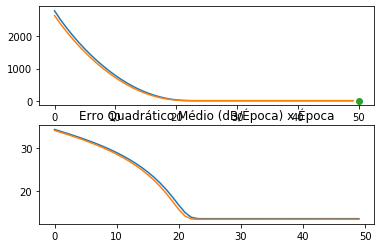

In [138]:
file = plt.figure()
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.plot(50, history.history['val_loss'][-1], marker='o', label='Erro de validação final:\n %0.3f $(GWh/h)^2$' % history.history['val_loss'][-1])
plt.title('Erro Quadrático Médio $(GWh/h)^2$ x Época')
plt.ylabel('Erro Quadrático Médio $(GWh/h)^2$')
plt.xlabel('Época')
plt.legend(loc='best')
plt.show()

#file.savefig("../brazilian-load-prediction/imagens/erro-network1.pdf", bbox_inches='tight')

In [179]:
y_mean = np.mean(y)
error = np.sqrt(history.history['val_loss'][-1])
percentage_error = error/y_mean * 100
percentage_error

8.796909407855091

## Ploting data samples

### Test base

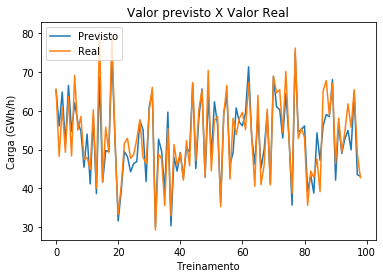

In [31]:
file = plt.figure()

plt.plot([y_pred[n] for n in range(0, len(y_pred)) if n % 200 == 0])
plt.plot([y_test[n] for n in range(0, len(y_pred)) if n % 200 == 0])
plt.title('Valor previsto X Valor Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Treinamento')
plt.legend(['Previsto', 'Real'], loc='upper left')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-base-teste-linear.pdf", bbox_inches='tight')

### Last Week

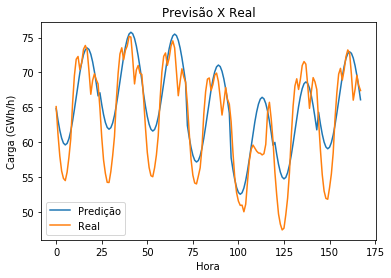

In [32]:
sc = StandardScaler()
y_last_linear = network.predict(sc.fit_transform(X))

file = plt.figure()

plt.plot(y_last_linear[-24*7:], label="Predição")
plt.plot(y[-24*7:], label="Real")
plt.legend(loc='best')

plt.title('Previsão X Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Hora')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-ultima-semana-linear.pdf", bbox_inches='tight')


# Others networks exp

### 2 layers, relu + linear

In [128]:
network_no_linear = Sequential()
network_no_linear.add(Dense(input_dim=X_train.shape[1], output_dim=44, activation='relu', bias_initializer='random_normal'))
network_no_linear.add(Dense(output_dim=1, activation='linear', bias_initializer='random_normal'))
network_no_linear.compile(optimizer='adam', loss='mean_squared_error')
history_no_linear = History()

network_no_linear.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, callbacks=[history_no_linear])
y_pred_no_linear = network_no_linear.predict(X_test)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=30, activation="relu", bias_initializer="random_normal", units=44)`
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", bias_initializer="random_normal", units=1)`
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 78403 samples, validate on 19601 samples
Epoch 1/50
78403/78403 [==============================] - 3s 39us/step - loss: 393.7107 - val_loss: 37.91670s - loss: 437
Epoch 2/50
78403/78403 [==============================] - 2s 28us/step - loss: 23.8163 - val_loss: 14.9820
Epoch 3/50
78403/78403 [==============================] - 2s 28us/step - loss: 12.3687 - val_loss: 10.1651
Epoch 4/50
78403/78403 [==============================] - 2s 28us/step - loss: 9.3483 - val_loss: 8.4687
Epoch 5/50
78403/78403 [==============================] - 2s 28us/step - loss: 7.8820 - val_loss: 7.2841
Epoch 6/50
78403/78403 [==============================] - 2s 28us/step - loss: 6.9428 - val_loss: 6.4605
Epoch 7/50
78403/78403 [==============================] - 2s 31us/step - loss: 6.2104 - val_loss: 5.8494
Epoch 8/50
78403/78403 [==============================] - 3s 33us/step - loss: 5.6333 - val_loss: 5.2969
Epoch 9/50
78403/78403 [==============================] - 2s 28us/step - loss: 5.2173 - v

In [52]:
y1 = network_no_linear.predict(X_train)

In [43]:
error = np.sum(np.square(y_pred_no_linear[:1000] - y_test[:1000]))/1000
error

225981.76748606577

In [48]:
part = np.square(y_pred_no_linear - y_test)

In [51]:
soma = np.sum(part)
soma/y_pred_no_linear.shape[0]

4487084.981529599

In [58]:
acc = 0
for i in range(0, y_train.shape[0]):
    acc += (y1[i] - y_train[i]) ** 2
result = acc/y_train.shape[0]
result

array([2.84470959])

In [60]:
acc = 0
for i in range(0, y_test.shape[0]):
    acc += (y_pred_no_linear[i] - y_test[i]) ** 2
result = acc/y_test.shape[0]
result

array([2.9185534], dtype=float32)

In [45]:
y_pred_no_linear

array([[66.8321  ],
       [60.934517],
       [42.760708],
       ...,
       [72.264595],
       [47.914547],
       [43.897575]], dtype=float32)

In [44]:
y_test

array([65.572  , 62.159  , 43.49495, ..., 70.991  , 45.21   , 42.748  ])

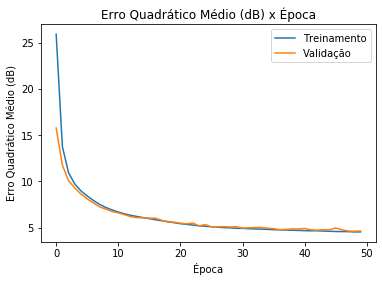

In [144]:
file = plt.figure()
plt.plot(10 * np.log10(history_no_linear.history['loss']), label='Treinamento')
plt.plot(10 * np.log10(history_no_linear.history['val_loss']), label='Validação')
plt.title('Erro Quadrático Médio (dB) x Época')
plt.ylabel('Erro Quadrático Médio (dB)')
plt.xlabel('Época')
plt.legend(loc='best')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/erro-network-relu.pdf", bbox_inches='tight')

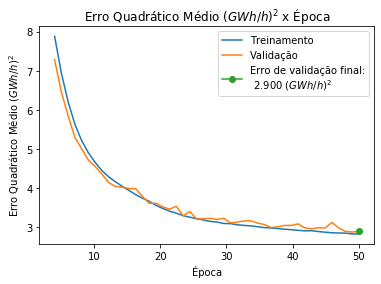

In [142]:
file = plt.figure()
x = np.linspace(0, 50, 50)

plt.plot(x[4:], history_no_linear.history['loss'][4:], label='Treinamento')
plt.plot(x[4:], history_no_linear.history['val_loss'][4:], label='Validação')
plt.plot(50, history_no_linear.history['val_loss'][-1], marker='o', label='Erro de validação final:\n %0.3f $(GWh/h)^2$' % history_no_linear.history['val_loss'][-1])
plt.title('Erro Quadrático Médio $(GWh/h)^2$ x Época')
plt.ylabel('Erro Quadrático Médio $(GWh/h)^2$')
plt.xlabel('Época')
plt.legend(loc='best')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/erro-network-relu2.pdf", bbox_inches='tight')

In [14]:
file = plt.figure()
plt.plot(history.history['loss'])
plt.title('Erro x Passos')
plt.ylabel('Erro')
plt.xlabel('Passos')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/erro-normal.pdf", bbox_inches='tight')

NameError: name 'plt' is not defined

In [180]:
y_mean = np.mean(y)
error = np.sqrt(2.7616)
percentage_error = error/y_mean * 100
percentage_error

3.14728641436256

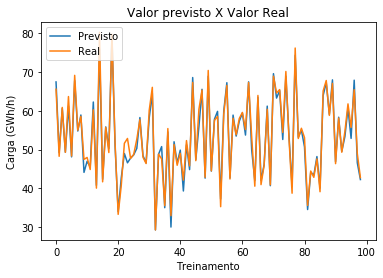

In [77]:
### Ploting for test base

file = plt.figure()

plt.plot([y_pred_no_linear[n] for n in range(0, len(y_pred_no_linear)) if n % 200 == 0])
plt.plot([y_test[n] for n in range(0, len(y_pred_no_linear)) if n % 200 == 0])
plt.title('Valor previsto X Valor Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Treinamento')
plt.legend(['Previsto', 'Real'], loc='upper left')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-base-teste-nao-linear.pdf", bbox_inches='tight')

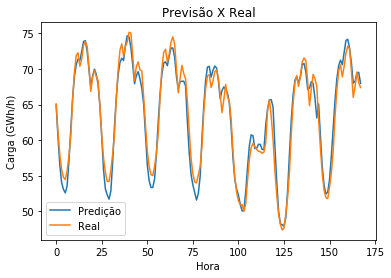

In [78]:
### Ploting for last week

sc = StandardScaler()
y_last_no_linear = network_no_linear.predict(sc.fit_transform(X))

file = plt.figure()

plt.plot(y_last_no_linear[-24*7:], label="Predição")
plt.plot(y[-24*7:], label="Real")
plt.legend(loc='best')

plt.title('Previsão X Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Hora')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-ultima-semana-nao-linear.pdf", bbox_inches='tight')

### Holidays networks

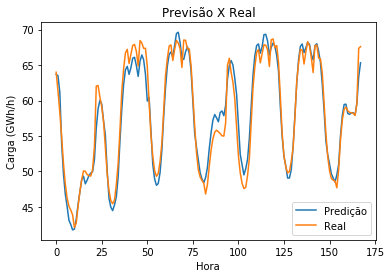

In [104]:
### Ploting for last week

sc = StandardScaler()
y_last_no_linear = network_no_linear.predict(sc.fit_transform(X))

file = plt.figure()

plt.plot(y_last_no_linear[-24*7*4 -3 :-24*7*3 -3], label="Predição")
plt.plot(y[-24*7*4 -3 :-24*7*3 -3], label="Real")
plt.legend(loc='best')

plt.title('Previsão X Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Hora')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-feriado-semana-nao-linear.pdf", bbox_inches='tight')

#### for holidays

In [154]:
#  filter original db
holidays_X = X[X[:, 8] == 1, :]
holidays_X = np.delete(holidays_X, 8, 1)

holidays_y = y[X[:, 8] == 1]

# split into train and test sets
holidays_X_train, holidays_X_test, holidays_y_train, holidays_y_test = train_test_split(holidays_X, holidays_y, test_size = 0.2 , random_state = 0)
sc = StandardScaler()

# scale
holidays_X_train = sc.fit_transform(holidays_X_train)
holidays_X_test = sc.transform(holidays_X_test)

# build network
network_holidays = Sequential()
network_holidays.add(Dense(input_dim=holidays_X_train.shape[1], output_dim=44, activation='relu', bias_initializer='random_normal'))
network_holidays.add(Dense(output_dim=1, activation='linear', bias_initializer='random_normal'))
network_holidays.compile(optimizer='adam', loss='mean_squared_error')
history_holidays = History()

# train
network_holidays.fit(holidays_X_train, holidays_y_train, validation_data=(holidays_X_test, holidays_y_test), epochs=500, callbacks=[history_holidays])
y_pred_holidays = network_holidays.predict(holidays_X_test)



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=29, activation="relu", bias_initializer="random_normal", units=44)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", bias_initializer="random_normal", units=1)`


Train on 2668 samples, validate on 667 samples
Epoch 1/500
2668/2668 [==============================] - 0s 184us/step - loss: 2111.8370 - val_loss: 1922.0237
Epoch 2/500
2668/2668 [==============================] - 0s 36us/step - loss: 1705.6181 - val_loss: 1425.8977
Epoch 3/500
2668/2668 [==============================] - 0s 32us/step - loss: 1169.6566 - val_loss: 875.3952
Epoch 4/500
2668/2668 [==============================] - 0s 33us/step - loss: 701.0959 - val_loss: 509.3655
Epoch 5/500
2668/2668 [==============================] - 0s 34us/step - loss: 439.2909 - val_loss: 340.5394
Epoch 6/500
2668/2668 [==============================] - 0s 33us/step - loss: 319.4160 - val_loss: 258.2404
Epoch 7/500
2668/2668 [==============================] - 0s 34us/step - loss: 247.1178 - val_loss: 203.7458
Epoch 8/500
2668/2668 [==============================] - 0s 33us/step - loss: 193.8478 - val_loss: 163.2919
Epoch 9/500
2668/2668 [==============================] - 0s 34us/step - loss: 155.6

2668/2668 [==============================] - 0s 41us/step - loss: 4.8402 - val_loss: 6.0511
Epoch 78/500
2668/2668 [==============================] - 0s 39us/step - loss: 4.8178 - val_loss: 5.9663
Epoch 79/500
2668/2668 [==============================] - 0s 40us/step - loss: 4.7152 - val_loss: 5.9540
Epoch 80/500
2668/2668 [==============================] - 0s 37us/step - loss: 4.6920 - val_loss: 5.8604
Epoch 81/500
2668/2668 [==============================] - 0s 38us/step - loss: 4.6049 - val_loss: 5.8805
Epoch 82/500
2668/2668 [==============================] - 0s 39us/step - loss: 4.5980 - val_loss: 5.8037
Epoch 83/500
2668/2668 [==============================] - 0s 40us/step - loss: 4.5192 - val_loss: 5.6879
Epoch 84/500
2668/2668 [==============================] - 0s 39us/step - loss: 4.5173 - val_loss: 5.6927
Epoch 85/500
2668/2668 [==============================] - 0s 55us/step - loss: 4.4739 - val_loss: 5.6359
Epoch 86/500
2668/2668 [==============================] - 0s 40us/st

2668/2668 [==============================] - 0s 43us/step - loss: 2.6673 - val_loss: 3.7963
Epoch 155/500
2668/2668 [==============================] - 0s 39us/step - loss: 2.6861 - val_loss: 3.8439
Epoch 156/500
2668/2668 [==============================] - 0s 40us/step - loss: 2.6249 - val_loss: 3.8253
Epoch 157/500
2668/2668 [==============================] - 0s 57us/step - loss: 2.6814 - val_loss: 3.8012
Epoch 158/500
2668/2668 [==============================] - 0s 56us/step - loss: 2.6431 - val_loss: 3.8659
Epoch 159/500
2668/2668 [==============================] - 0s 56us/step - loss: 2.5820 - val_loss: 3.7482
Epoch 160/500
2668/2668 [==============================] - 0s 52us/step - loss: 2.5349 - val_loss: 3.7540
Epoch 161/500
2668/2668 [==============================] - 0s 36us/step - loss: 2.5559 - val_loss: 3.8196
Epoch 162/500
2668/2668 [==============================] - 0s 67us/step - loss: 2.5283 - val_loss: 3.7971
Epoch 163/500
2668/2668 [==============================] - 0

2668/2668 [==============================] - 0s 48us/step - loss: 1.9204 - val_loss: 3.0521
Epoch 232/500
2668/2668 [==============================] - 0s 44us/step - loss: 1.9258 - val_loss: 3.2058
Epoch 233/500
2668/2668 [==============================] - 0s 54us/step - loss: 1.9170 - val_loss: 3.0816
Epoch 234/500
2668/2668 [==============================] - 0s 36us/step - loss: 1.9182 - val_loss: 3.0677
Epoch 235/500
2668/2668 [==============================] - 0s 46us/step - loss: 1.8921 - val_loss: 3.0123
Epoch 236/500
2668/2668 [==============================] - 0s 43us/step - loss: 1.8979 - val_loss: 3.0090
Epoch 237/500
2668/2668 [==============================] - 0s 77us/step - loss: 1.8843 - val_loss: 3.0146
Epoch 238/500
2668/2668 [==============================] - 0s 61us/step - loss: 1.8998 - val_loss: 3.0805
Epoch 239/500
2668/2668 [==============================] - 0s 59us/step - loss: 1.8948 - val_loss: 3.0220
Epoch 240/500
2668/2668 [==============================] - 0

2668/2668 [==============================] - 0s 33us/step - loss: 1.6650 - val_loss: 2.7311
Epoch 309/500
2668/2668 [==============================] - 0s 30us/step - loss: 1.6220 - val_loss: 2.6682
Epoch 310/500
2668/2668 [==============================] - 0s 30us/step - loss: 1.6628 - val_loss: 2.7796
Epoch 311/500
2668/2668 [==============================] - 0s 33us/step - loss: 1.6168 - val_loss: 2.7042
Epoch 312/500
2668/2668 [==============================] - 0s 29us/step - loss: 1.6223 - val_loss: 2.7272
Epoch 313/500
2668/2668 [==============================] - 0s 30us/step - loss: 1.6326 - val_loss: 2.7129
Epoch 314/500
2668/2668 [==============================] - 0s 34us/step - loss: 1.6209 - val_loss: 2.6791
Epoch 315/500
2668/2668 [==============================] - 0s 33us/step - loss: 1.6524 - val_loss: 2.8843
Epoch 316/500
2668/2668 [==============================] - 0s 36us/step - loss: 1.6591 - val_loss: 2.7573
Epoch 317/500
2668/2668 [==============================] - 0

2668/2668 [==============================] - 0s 40us/step - loss: 1.4766 - val_loss: 2.6111
Epoch 386/500
2668/2668 [==============================] - 0s 32us/step - loss: 1.4994 - val_loss: 2.4978
Epoch 387/500
2668/2668 [==============================] - 0s 30us/step - loss: 1.4896 - val_loss: 2.5177
Epoch 388/500
2668/2668 [==============================] - 0s 31us/step - loss: 1.4668 - val_loss: 2.5048
Epoch 389/500
2668/2668 [==============================] - 0s 44us/step - loss: 1.4867 - val_loss: 2.5273
Epoch 390/500
2668/2668 [==============================] - 0s 42us/step - loss: 1.4865 - val_loss: 2.5194
Epoch 391/500
2668/2668 [==============================] - 0s 43us/step - loss: 1.5016 - val_loss: 2.5441
Epoch 392/500
2668/2668 [==============================] - 0s 43us/step - loss: 1.4638 - val_loss: 2.6104
Epoch 393/500
2668/2668 [==============================] - 0s 53us/step - loss: 1.4554 - val_loss: 2.6814
Epoch 394/500
2668/2668 [==============================] - 0

2668/2668 [==============================] - 0s 35us/step - loss: 1.4139 - val_loss: 2.4976
Epoch 463/500
2668/2668 [==============================] - 0s 31us/step - loss: 1.3764 - val_loss: 2.4553
Epoch 464/500
2668/2668 [==============================] - 0s 33us/step - loss: 1.3736 - val_loss: 2.4114
Epoch 465/500
2668/2668 [==============================] - 0s 79us/step - loss: 1.3656 - val_loss: 2.4918
Epoch 466/500
2668/2668 [==============================] - 0s 56us/step - loss: 1.3919 - val_loss: 2.5317
Epoch 467/500
2668/2668 [==============================] - 0s 33us/step - loss: 1.4148 - val_loss: 2.6626
Epoch 468/500
2668/2668 [==============================] - 0s 29us/step - loss: 1.4047 - val_loss: 2.4466
Epoch 469/500
2668/2668 [==============================] - 0s 30us/step - loss: 1.4073 - val_loss: 2.4429
Epoch 470/500
2668/2668 [==============================] - 0s 42us/step - loss: 1.4048 - val_loss: 2.4420
Epoch 471/500
2668/2668 [==============================] - 0

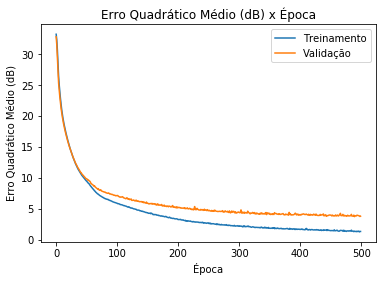

In [155]:
file = plt.figure()

plt.plot(10 * np.log10(history_holidays.history['loss']), label='Treinamento')
plt.plot(10 * np.log10(history_holidays.history['val_loss']), label='Validação')
plt.title('Erro Quadrático Médio (dB) x Época')
plt.ylabel('Erro Quadrático Médio (dB)')
plt.xlabel('Época')
plt.legend(loc='best')

plt.show()

file.savefig("../brazilian-load-prediction/imagens/erro-network-holidays.pdf", bbox_inches='tight')


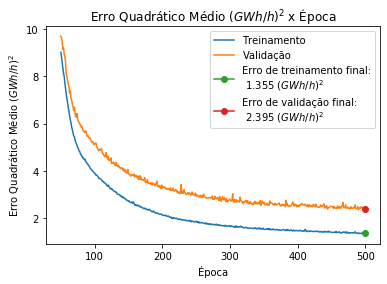

In [158]:
x = np.linspace(50, 500, 451)

file = plt.figure()

plt.plot(x, history_holidays.history['loss'][49:], label='Treinamento')
plt.plot(x, history_holidays.history['val_loss'][49:], label='Validação')
plt.plot(500, history_holidays.history['loss'][-1], marker='o', label='Erro de treinamento final:\n %0.3f $(GWh/h)^2$' % history_holidays.history['loss'][-1])
plt.plot(500, history_holidays.history['val_loss'][-1], marker='o', label='Erro de validação final:\n %0.3f $(GWh/h)^2$' % history_holidays.history['val_loss'][-1])
plt.title('Erro Quadrático Médio $(GWh/h)^2$ x Época')
plt.ylabel('Erro Quadrático Médio $(GWh/h)^2$')
plt.xlabel('Época')
plt.legend(loc='best')

plt.show()

file.savefig("../brazilian-load-prediction/imagens/erro-network-holidays2.pdf", bbox_inches='tight')

In [181]:
y_mean = np.mean(y)
error = np.sqrt(2.5185)
percentage_error = error/y_mean * 100
percentage_error

3.0055700724401917

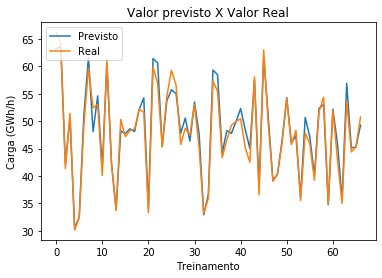

In [127]:
### Ploting for test base

file = plt.figure()

plt.plot([y_pred_holidays[n] for n in range(0, len(y_pred_holidays)) if n % 10 == 0])
plt.plot([holidays_y_test[n] for n in range(0, len(y_pred_holidays)) if n % 10 == 0])
plt.title('Valor previsto X Valor Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Treinamento')
plt.legend(['Previsto', 'Real'], loc='upper left')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-base-teste-feriados.pdf", bbox_inches='tight')

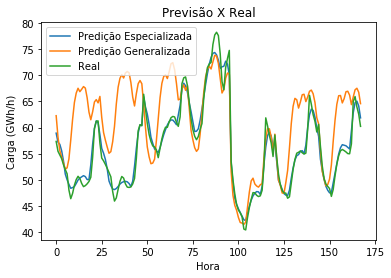

In [131]:
### Ploting for last holidays

sc = StandardScaler()
y_last_holidays = network_holidays.predict(sc.fit_transform(holidays_X))
y_last_holidays_old = network_no_linear.predict(sc.fit_transform(X[X[:, 8] == 1, :]))

file = plt.figure()

plt.plot(y_last_holidays[-24*7:], label="Predição Especializada")
plt.plot(y_last_holidays_old[-24*7:], label="Predição Generalizada")
plt.plot(holidays_y[-24*7:], label="Real")
plt.legend(loc='best')

plt.title('Previsão X Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Hora')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-feriados.pdf", bbox_inches='tight')

#### for not holidays

In [159]:
#  filter original db
no_holidays_X = X[X[:, 8] == 0, :]
no_holidays_X = np.delete(no_holidays_X, 8, 1)

no_holidays_y = y[X[:, 8] == 0]

# split into train and test sets
no_holidays_X_train, no_holidays_X_test, no_holidays_y_train, no_holidays_y_test = train_test_split(no_holidays_X, no_holidays_y, test_size = 0.2 , random_state = 0)
sc = StandardScaler()

# scale
no_holidays_X_train = sc.fit_transform(no_holidays_X_train)
no_holidays_X_test = sc.transform(no_holidays_X_test)

# build network
network_no_holidays = Sequential()
network_no_holidays.add(Dense(input_dim=no_holidays_X.shape[1], output_dim=44, activation='relu', bias_initializer='random_normal'))
network_no_holidays.add(Dense(output_dim=1, activation='linear', bias_initializer='random_normal'))
network_no_holidays.compile(optimizer='adam', loss='mean_squared_error')
history_no_holidays = History()

# train
network_no_holidays.fit(no_holidays_X_train, no_holidays_y_train, validation_data=(no_holidays_X_test, no_holidays_y_test), epochs=50, callbacks=[history_no_holidays])
y_pred_no_holidays = network_no_holidays.predict(no_holidays_X_test)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=29, activation="relu", bias_initializer="random_normal", units=44)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", bias_initializer="random_normal", units=1)`


Train on 75735 samples, validate on 18934 samples
Epoch 1/50
75735/75735 [==============================] - 3s 40us/step - loss: 488.0871 - val_loss: 44.4195
Epoch 2/50
75735/75735 [==============================] - 3s 33us/step - loss: 27.3902 - val_loss: 17.2415
Epoch 3/50
75735/75735 [==============================] - 2s 30us/step - loss: 12.7930 - val_loss: 10.2336
Epoch 4/50
75735/75735 [==============================] - 3s 38us/step - loss: 9.1844 - val_loss: 8.3373
Epoch 5/50
75735/75735 [==============================] - 3s 37us/step - loss: 7.8078 - val_loss: 7.4142
Epoch 6/50
75735/75735 [==============================] - 3s 40us/step - loss: 6.7884 - val_loss: 6.3977
Epoch 7/50
75735/75735 [==============================] - 2s 33us/step - loss: 6.0552 - val_loss: 5.8007
Epoch 8/50
75735/75735 [==============================] - 2s 33us/step - loss: 5.5428 - val_loss: 5.4257
Epoch 9/50
75735/75735 [==============================] - 2s 33us/step - loss: 5.1656 - val_loss: 5.038

In [182]:
y_mean = np.mean(y)
error = np.sqrt(2.9128)
percentage_error = error/y_mean * 100
percentage_error

3.2322966567242095

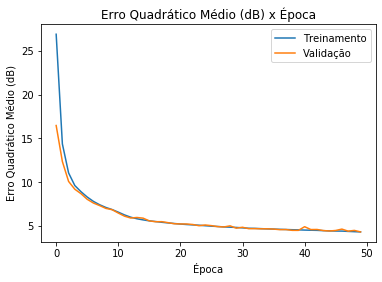

In [161]:
### Error
file = plt.figure()

plt.plot(10 * np.log10(history_no_holidays.history['loss']), label='Treinamento')
plt.plot(10 * np.log10(history_no_holidays.history['val_loss']), label='Validação')
plt.title('Erro Quadrático Médio (dB) x Época')
plt.ylabel('Erro Quadrático Médio (dB)')
plt.xlabel('Época')
plt.legend(loc='best')

plt.show()

file.savefig("../brazilian-load-prediction/imagens/erro-network-no-holidays.pdf", bbox_inches='tight')


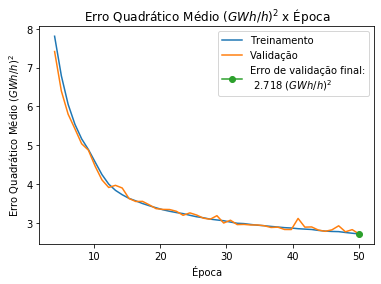

In [162]:
file = plt.figure()

x = np.linspace(0, 50, 50)

plt.plot(x[4:], history_no_holidays.history['loss'][4:], label='Treinamento')
plt.plot(x[4:], history_no_holidays.history['val_loss'][4:], label='Validação')
plt.plot(50, history_no_holidays.history['val_loss'][-1], marker='o', label='Erro de validação final:\n %0.3f $(GWh/h)^2$' % history_no_holidays.history['val_loss'][-1])
plt.title('Erro Quadrático Médio $(GWh/h)^2$ x Época')
plt.ylabel('Erro Quadrático Médio $(GWh/h)^2$')
plt.xlabel('Época')
plt.legend(loc='best')

plt.show()

file.savefig("../brazilian-load-prediction/imagens/erro-network-no-holidays2.pdf", bbox_inches='tight')

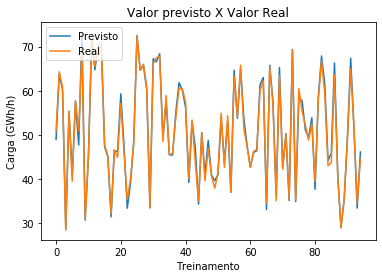

In [136]:
### Ploting for test base

file = plt.figure()

plt.plot([y_pred_no_holidays[n] for n in range(0, len(y_pred_no_holidays)) if n % 200 == 0])
plt.plot([no_holidays_y_test[n] for n in range(0, len(y_pred_no_holidays)) if n % 200 == 0])
plt.title('Valor previsto X Valor Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Treinamento')
plt.legend(['Previsto', 'Real'], loc='upper left')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-base-teste-nao-feriados.pdf", bbox_inches='tight')

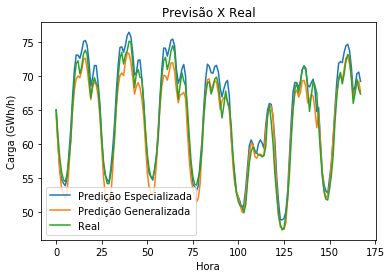

In [138]:
### Ploting for last week

sc = StandardScaler()
y_last_no_holidays = network_no_holidays.predict(sc.fit_transform(no_holidays_X))
y_last_no_holidays_old = network_no_linear.predict(sc.fit_transform(X[X[:, 8] == 0, :]))

file = plt.figure()

plt.plot(y_last_no_holidays[-24*7:], label="Predição Especializada")
plt.plot(y_last_no_holidays_old[-24*7:], label="Predição Generalizada")
plt.plot(no_holidays_y[-24*7:], label="Real")
plt.legend(loc='best')

plt.title('Previsão X Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Hora')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-nao-feriados.pdf", bbox_inches='tight')

### last year network

In [163]:
dataset.columns.tolist()

['Anos após 2000',
 'Mês do Ano',
 'Dia do Mês',
 'Hora do dia',
 'Dia da Semana',
 'Feriado',
 'temp-go.csv',
 'temp-to.csv',
 'temp-am.csv',
 'temp-df.csv',
 'temp-rs.csv',
 'temp-al.csv',
 'temp-pe.csv',
 'temp-pa.csv',
 'temp-mg.csv',
 'temp-ce.csv',
 'temp-rn.csv',
 'temp-rj.csv',
 'temp-pi.csv',
 'temp-sp.csv',
 'temp-ac.csv',
 'temp-pb.csv',
 'temp-mt.csv',
 'temp-es.csv',
 'temp-ba.csv',
 'temp-ap.csv',
 'temp-pr.csv',
 'temp-sc.csv',
 'temp-se.csv',
 'temp-ma.csv',
 'Carga']

In [164]:
dataset.columns.tolist().index('temp-am.csv')

8

In [165]:
dataset.columns.tolist().index('temp-ap.csv')

25

In [166]:
dataset.columns.tolist().index('temp-ac.csv')

20

In [167]:
# correlation

values = np.insert(last_year_X, last_year_X.shape[1], last_year_y, 1)
dataframe = pd.DataFrame(values)
corr = dataframe.corr(min_periods=1000)
corr[values.shape[1]-1]

NameError: name 'last_year_X' is not defined

In [172]:
#  filter original db
last_year_X = dataset.iloc[:, :-1].values[-24*365:, ]
last_year_y = y[-24*365:]

# cycle features
months_in_year = 12
months = last_year_X[:, 1]
sin_month = np.sin(2*np.pi*months/months_in_year)
cos_month = np.cos(2*np.pi*months/months_in_year)
last_year_X = np.delete(last_year_X, 1, 1)
last_year_X = np.insert(last_year_X, 1, sin_month, 1)
last_year_X = np.insert(last_year_X, 2, cos_month, 1)

hours_in_day = 24
hours = last_year_X[:, 4]
sin_hour = np.sin(2*np.pi*hours/hours_in_day)
cos_hour = np.cos(2*np.pi*hours/hours_in_day)

last_year_X = np.delete(last_year_X, 4, 1)
last_year_X = np.insert(last_year_X, 4, sin_hour, 1)
last_year_X = np.insert(last_year_X, 5, cos_hour, 1)

number_of_weekdays = 7
weekdays = last_year_X[:, 6]
sin_weekdays = np.sin(2*np.pi*weekdays/number_of_weekdays)
cos_weekdays = np.cos(2*np.pi*weekdays/number_of_weekdays)
last_year_X = np.delete(last_year_X, 6, 1)
last_year_X = np.insert(last_year_X, 6, sin_weekdays, 1)
last_year_X = np.insert(last_year_X, 7, cos_weekdays, 1)

# split into train and test sets
last_year_X_train, last_year_X_test, last_year_y_train, last_year_y_test = train_test_split(last_year_X, last_year_y, test_size = 0.2 , random_state = 0)
sc = StandardScaler()

# scale
last_year_X_train = sc.fit_transform(last_year_X_train)
last_year_X_test = sc.fit_transform(last_year_X_test)

# build network
last_year_network = Sequential()
last_year_network.add(Dense(input_dim=last_year_X_train.shape[1], output_dim=44, activation='relu', bias_initializer='random_normal'))
last_year_network.add(Dense(output_dim=1, activation='linear', bias_initializer='random_normal'))
last_year_network.compile(optimizer='adam', loss='mean_squared_error')
last_year_history = History()

# train
last_year_network.fit(last_year_X_train, last_year_y_train, validation_data=(last_year_X_test, last_year_y_test), epochs=500, callbacks=[last_year_history])
last_year_y_pred = last_year_network.predict(last_year_X_test)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=33, activation="relu", bias_initializer="random_normal", units=44)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", bias_initializer="random_normal", units=1)`


Train on 7008 samples, validate on 1752 samples
Epoch 1/500
7008/7008 [==============================] - 1s 99us/step - loss: 2962.8810 - val_loss: 1807.9552
Epoch 2/500
7008/7008 [==============================] - 0s 32us/step - loss: 984.9928 - val_loss: 521.5902
Epoch 3/500
7008/7008 [==============================] - 0s 31us/step - loss: 446.4236 - val_loss: 370.9054
Epoch 4/500
7008/7008 [==============================] - 0s 32us/step - loss: 326.8604 - val_loss: 271.9866
Epoch 5/500
7008/7008 [==============================] - 0s 32us/step - loss: 234.4875 - val_loss: 195.4613
Epoch 6/500
7008/7008 [==============================] - 0s 31us/step - loss: 167.7308 - val_loss: 142.5454
Epoch 7/500
7008/7008 [==============================] - 0s 31us/step - loss: 122.7854 - val_loss: 106.7542
Epoch 8/500
7008/7008 [==============================] - 0s 32us/step - loss: 92.6811 - val_loss: 82.3909
Epoch 9/500
7008/7008 [==============================] - 0s 32us/step - loss: 73.1598 - 

Epoch 78/500
7008/7008 [==============================] - 0s 30us/step - loss: 4.4677 - val_loss: 5.1626
Epoch 79/500
7008/7008 [==============================] - 0s 31us/step - loss: 4.4060 - val_loss: 5.0955
Epoch 80/500
7008/7008 [==============================] - 0s 34us/step - loss: 4.3561 - val_loss: 5.0130
Epoch 81/500
7008/7008 [==============================] - 0s 30us/step - loss: 4.3212 - val_loss: 4.8995
Epoch 82/500
7008/7008 [==============================] - 0s 30us/step - loss: 4.2699 - val_loss: 4.9232
Epoch 83/500
7008/7008 [==============================] - 0s 30us/step - loss: 4.2309 - val_loss: 4.8796
Epoch 84/500
7008/7008 [==============================] - 0s 30us/step - loss: 4.1645 - val_loss: 4.9302
Epoch 85/500
7008/7008 [==============================] - 0s 30us/step - loss: 4.1347 - val_loss: 4.9947
Epoch 86/500
7008/7008 [==============================] - 0s 29us/step - loss: 4.1114 - val_loss: 4.8138
Epoch 87/500
7008/7008 [==============================]

7008/7008 [==============================] - 0s 29us/step - loss: 2.6469 - val_loss: 3.2419
Epoch 156/500
7008/7008 [==============================] - 0s 30us/step - loss: 2.6243 - val_loss: 3.4032
Epoch 157/500
7008/7008 [==============================] - 0s 29us/step - loss: 2.6245 - val_loss: 3.2017
Epoch 158/500
7008/7008 [==============================] - 0s 30us/step - loss: 2.6006 - val_loss: 3.1932
Epoch 159/500
7008/7008 [==============================] - 0s 29us/step - loss: 2.6632 - val_loss: 3.2953
Epoch 160/500
7008/7008 [==============================] - 0s 29us/step - loss: 2.5985 - val_loss: 3.1963
Epoch 161/500
7008/7008 [==============================] - 0s 30us/step - loss: 2.5800 - val_loss: 3.1935
Epoch 162/500
7008/7008 [==============================] - 0s 29us/step - loss: 2.5827 - val_loss: 3.1270
Epoch 163/500
7008/7008 [==============================] - 0s 30us/step - loss: 2.5714 - val_loss: 3.2207
Epoch 164/500
7008/7008 [==============================] - 0

7008/7008 [==============================] - 0s 39us/step - loss: 2.1586 - val_loss: 2.6773
Epoch 233/500
7008/7008 [==============================] - 0s 34us/step - loss: 2.1482 - val_loss: 2.6898
Epoch 234/500
7008/7008 [==============================] - 0s 32us/step - loss: 2.1381 - val_loss: 2.6981
Epoch 235/500
7008/7008 [==============================] - 0s 56us/step - loss: 2.1521 - val_loss: 2.8137
Epoch 236/500
7008/7008 [==============================] - 0s 42us/step - loss: 2.1377 - val_loss: 2.7929
Epoch 237/500
7008/7008 [==============================] - 0s 33us/step - loss: 2.1588 - val_loss: 2.8223
Epoch 238/500
7008/7008 [==============================] - 0s 41us/step - loss: 2.1398 - val_loss: 2.6315
Epoch 239/500
7008/7008 [==============================] - 0s 40us/step - loss: 2.1247 - val_loss: 2.5847
Epoch 240/500
7008/7008 [==============================] - 0s 39us/step - loss: 2.1423 - val_loss: 2.7305
Epoch 241/500
7008/7008 [==============================] - 0

7008/7008 [==============================] - 0s 49us/step - loss: 1.9505 - val_loss: 2.5104
Epoch 310/500
7008/7008 [==============================] - 0s 50us/step - loss: 1.9439 - val_loss: 2.5774
Epoch 311/500
7008/7008 [==============================] - 0s 33us/step - loss: 1.9455 - val_loss: 2.5049
Epoch 312/500
7008/7008 [==============================] - 0s 46us/step - loss: 1.9521 - val_loss: 2.4678
Epoch 313/500
7008/7008 [==============================] - 0s 47us/step - loss: 1.9459 - val_loss: 2.7102
Epoch 314/500
7008/7008 [==============================] - 0s 52us/step - loss: 1.9567 - val_loss: 2.4617
Epoch 315/500
7008/7008 [==============================] - 0s 39us/step - loss: 1.9324 - val_loss: 2.5009
Epoch 316/500
7008/7008 [==============================] - 0s 39us/step - loss: 1.9429 - val_loss: 2.4584
Epoch 317/500
7008/7008 [==============================] - 0s 35us/step - loss: 1.9493 - val_loss: 2.4928
Epoch 318/500
7008/7008 [==============================] - 0

7008/7008 [==============================] - 0s 39us/step - loss: 1.8543 - val_loss: 2.4322
Epoch 387/500
7008/7008 [==============================] - 0s 37us/step - loss: 1.8381 - val_loss: 2.5073
Epoch 388/500
7008/7008 [==============================] - 0s 44us/step - loss: 1.8472 - val_loss: 2.5377
Epoch 389/500
7008/7008 [==============================] - 0s 53us/step - loss: 1.8413 - val_loss: 2.3378
Epoch 390/500
7008/7008 [==============================] - 0s 33us/step - loss: 1.8415 - val_loss: 2.3537
Epoch 391/500
7008/7008 [==============================] - 0s 53us/step - loss: 1.8440 - val_loss: 2.3977
Epoch 392/500
7008/7008 [==============================] - 0s 37us/step - loss: 1.8483 - val_loss: 2.3668
Epoch 393/500
7008/7008 [==============================] - 0s 39us/step - loss: 1.8419 - val_loss: 2.3641
Epoch 394/500
7008/7008 [==============================] - 0s 37us/step - loss: 1.8397 - val_loss: 2.5033
Epoch 395/500
7008/7008 [==============================] - 0

7008/7008 [==============================] - 0s 38us/step - loss: 1.7692 - val_loss: 2.4357
Epoch 464/500
7008/7008 [==============================] - 0s 43us/step - loss: 1.7646 - val_loss: 2.3472
Epoch 465/500
7008/7008 [==============================] - 0s 49us/step - loss: 1.7596 - val_loss: 2.4516
Epoch 466/500
7008/7008 [==============================] - 0s 33us/step - loss: 1.7697 - val_loss: 2.6483
Epoch 467/500
7008/7008 [==============================] - 0s 32us/step - loss: 1.7832 - val_loss: 2.4526
Epoch 468/500
7008/7008 [==============================] - 0s 37us/step - loss: 1.7758 - val_loss: 2.4338
Epoch 469/500
7008/7008 [==============================] - 0s 31us/step - loss: 1.7730 - val_loss: 2.4048
Epoch 470/500
7008/7008 [==============================] - 0s 39us/step - loss: 1.7615 - val_loss: 2.3737
Epoch 471/500
7008/7008 [==============================] - 0s 41us/step - loss: 1.7817 - val_loss: 2.2866
Epoch 472/500
7008/7008 [==============================] - 0

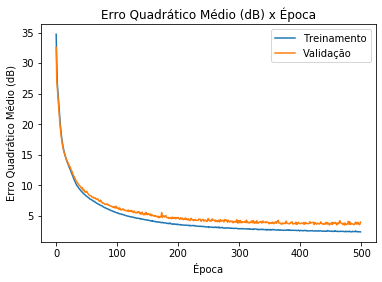

In [173]:
### Error

file = plt.figure()

plt.plot(10 * np.log10(last_year_history.history['loss']), label='Treinamento')
plt.plot(10 * np.log10(last_year_history.history['val_loss']), label='Validação')
plt.title('Erro Quadrático Médio (dB) x Época')
plt.ylabel('Erro Quadrático Médio (dB)')
plt.xlabel('Época')
plt.legend(loc='best')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/erro-network-last-year.pdf", bbox_inches='tight')

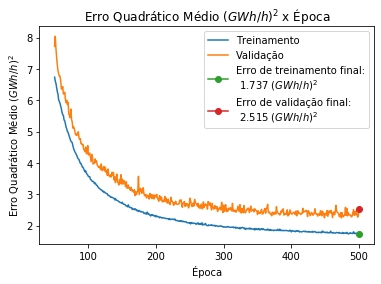

In [174]:
x = np.linspace(50, 500, 451)


file = plt.figure()

plt.plot(x, last_year_history.history['loss'][49:], label='Treinamento')
plt.plot(x, last_year_history.history['val_loss'][49:], label='Validação')
plt.plot(500, last_year_history.history['loss'][-1], marker='o', label='Erro de treinamento final:\n %0.3f $(GWh/h)^2$' % last_year_history.history['loss'][-1])
plt.plot(500, last_year_history.history['val_loss'][-1], marker='o', label='Erro de validação final:\n %0.3f $(GWh/h)^2$' % last_year_history.history['val_loss'][-1])
plt.title('Erro Quadrático Médio $(GWh/h)^2$ x Época')
plt.ylabel('Erro Quadrático Médio $(GWh/h)^2$')
plt.xlabel('Época')
plt.legend(loc='best')

plt.show()

file.savefig("../brazilian-load-prediction/imagens/erro-network-last-year2.pdf", bbox_inches='tight')


In [183]:
y_mean = np.mean(last_year_y)
error = np.sqrt(2.2006)
percentage_error = error/y_mean * 100
percentage_error

2.4285916018397127

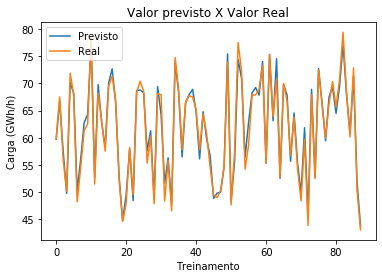

In [151]:
### Ploting for test base

file = plt.figure()

plt.plot([last_year_y_pred[n] for n in range(0, len(last_year_y_pred)) if n % 20 == 0])
plt.plot([last_year_y_test[n] for n in range(0, len(last_year_y_pred)) if n % 20 == 0])
plt.title('Valor previsto X Valor Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Treinamento')
plt.legend(['Previsto', 'Real'], loc='upper left')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-base-teste-ultimo-ano.pdf", bbox_inches='tight')

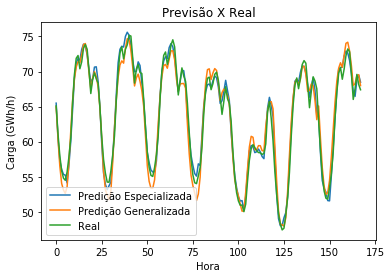

In [153]:
### Ploting for last week

sc = StandardScaler()
last_year_y = last_year_network.predict(sc.fit_transform(last_year_X))
y_last_no_holidays_old = network_no_linear.predict(sc.fit_transform(X))

file = plt.figure()

plt.plot(last_year_y[-24*7:], label="Predição Especializada")
plt.plot(y_last_no_holidays_old[-24*7:], label="Predição Generalizada")
plt.plot(y[-24*7:], label="Real")
plt.legend(loc='best')

plt.title('Previsão X Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Hora')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-ultimo-ano.pdf", bbox_inches='tight')

### Load time shift network

In [175]:
# add shifted load
last_hour_load = np.delete(y, 0, 0)
last_hour_X = np.delete(X, X.shape[0]-1, 0)
last_hour_y = np.delete(y, y.shape[0]-1, 0)
last_hour_X = np.insert(last_hour_X, last_hour_X.shape[1], last_hour_load, 1)

# split into train and test sets
last_hour_X_train, last_hour_X_test, last_hour_y_train, last_hour_y_test = train_test_split(last_hour_X, last_hour_y, test_size = 0.2 , random_state = 0)
sc = StandardScaler()

# scale
last_hour_X_train = sc.fit_transform(last_hour_X_train)
last_hour_X_test = sc.fit_transform(last_hour_X_test)

# build network
last_hour_network = Sequential()

last_hour_dense1 = Dense(input_dim=last_hour_X.shape[1], output_dim=44, activation='relu', bias_initializer='random_normal')
last_hour_dense2 = Dense(output_dim=1, activation='linear', bias_initializer='random_normal')

last_hour_network.add(last_hour_dense1)
last_hour_network.add(last_hour_dense2)
last_hour_network.compile(optimizer='adam', loss='mean_squared_error')
last_hour_history = History()

# train
last_hour_network.fit(last_hour_X_train, last_hour_y_train, validation_data=(last_hour_X_test, last_hour_y_test), epochs=50, callbacks=[last_hour_history])
last_hour_y_pred = last_hour_network.predict(last_hour_X_test)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=31, activation="relu", bias_initializer="random_normal", units=44)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", bias_initializer="random_normal", units=1)`


Train on 78402 samples, validate on 19601 samples
Epoch 1/50
78402/78402 [==============================] - 3s 38us/step - loss: 427.5839 - val_loss: 23.4734
Epoch 2/50
78402/78402 [==============================] - 2s 31us/step - loss: 11.4698 - val_loss: 6.1153
Epoch 3/50
78402/78402 [==============================] - 2s 32us/step - loss: 4.2618 - val_loss: 3.4126 0s - loss: 4.278
Epoch 4/50
78402/78402 [==============================] - 3s 39us/step - loss: 3.0739 - val_loss: 3.0054
Epoch 5/50
78402/78402 [==============================] - 3s 34us/step - loss: 2.6295 - val_loss: 2.5624
Epoch 6/50
78402/78402 [==============================] - 4s 54us/step - loss: 2.3613 - val_loss: 2.3448
Epoch 7/50
78402/78402 [==============================] - 3s 36us/step - loss: 2.1803 - val_loss: 2.2000
Epoch 8/50
78402/78402 [==============================] - 3s 35us/step - loss: 2.0679 - val_loss: 2.0990
Epoch 9/50
78402/78402 [==============================] - 4s 49us/step - loss: 1.9831 - v

In [176]:
# correlation

values = np.insert(last_hour_X, last_hour_X.shape[1], last_hour_y, 1)
dataframe = pd.DataFrame(values)
corr = dataframe.corr(min_periods=1000)
corr[values.shape[1]-1]


0     0.701910
1     0.097148
2     0.100691
3     0.007004
4    -0.441680
5    -0.112475
6     0.209079
7    -0.117775
8    -0.102862
9     0.108995
10    0.035748
11    0.130964
12    0.147729
13    0.204676
14    0.126223
15    0.190142
16    0.190142
17    0.157393
18    0.104118
19    0.120988
20   -0.047577
21    0.180580
22    0.120942
23    0.124708
24    0.154440
25    0.022655
26    0.167262
27    0.156397
28    0.214941
29    0.169024
30    0.974612
31    1.000000
Name: 31, dtype: float64

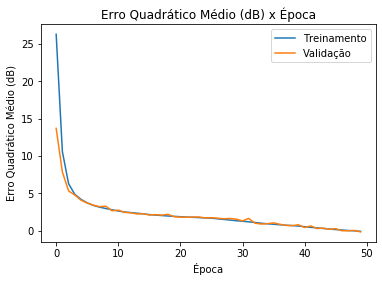

In [177]:
### Error ploting

x = np.linspace(0, 50, 50)

file = plt.figure()
plt.plot(10 * np.log10(last_hour_history.history['loss']), label='Treinamento')
plt.plot(10 * np.log10(last_hour_history.history['val_loss']), label='Validação')
plt.title('Erro Quadrático Médio (dB) x Época')
plt.ylabel('Erro Quadrático Médio (dB)')
plt.xlabel('Época')
plt.legend(loc='best')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/erro-network-last-hour.pdf", bbox_inches='tight')

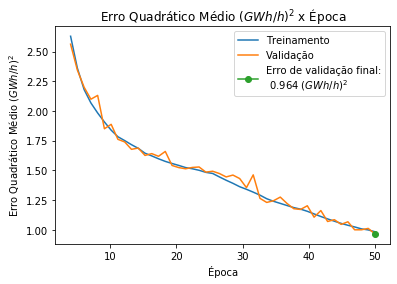

In [178]:
x = np.linspace(4, 50, 46)

file = plt.figure()
plt.plot(x, last_hour_history.history['loss'][4:], label='Treinamento')
plt.plot(x, last_hour_history.history['val_loss'][4:], label='Validação')
plt.plot(50, last_hour_history.history['val_loss'][-1], marker='o', label='Erro de validação final:\n %0.3f $(GWh/h)^2$' % last_hour_history.history['val_loss'][-1])
plt.title('Erro Quadrático Médio $(GWh/h)^2$ x Época')
plt.ylabel('Erro Quadrático Médio $(GWh/h)^2$')
plt.xlabel('Época')
plt.legend(loc='best')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/erro-network-last-hour2.pdf", bbox_inches='tight')



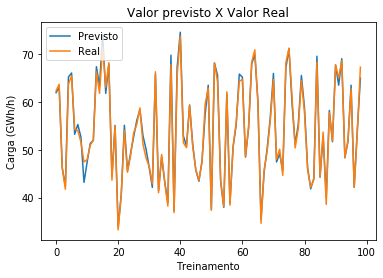

In [173]:
### Ploting for test base

file = plt.figure()

plt.plot([last_hour_y_pred[n] for n in range(0, len(last_hour_y_pred)) if n % 200 == 0])
plt.plot([last_hour_y_test[n] for n in range(0, len(last_hour_y_pred)) if n % 200 == 0])
plt.title('Valor previsto X Valor Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Treinamento')
plt.legend(['Previsto', 'Real'], loc='upper left')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-base-teste-ultima-hora.pdf", bbox_inches='tight')

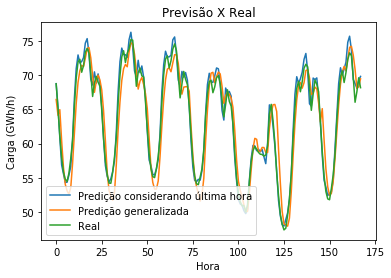

In [174]:
### Ploting for last week

sc = StandardScaler()
last_hour_y = last_hour_network.predict(sc.fit_transform(last_hour_X))
y_last_no_holidays_old = network_no_linear.predict(sc.fit_transform(X[:-1,]))

file = plt.figure()

plt.plot(last_hour_y[-24*7:], label="Predição considerando última hora")
plt.plot(y_last_no_holidays_old[-24*7-1:-1], label="Predição generalizada")
plt.plot(y[-24*7-1:-1], label="Real")
plt.legend(loc='best')

plt.title('Previsão X Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Hora')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-ultima-hora.pdf", bbox_inches='tight')

In [184]:
y_mean = np.mean(last_hour_y)
error = np.sqrt(last_hour_history.history['val_loss'][-1])
percentage_error = error/y_mean * 100
percentage_error

1.8597040186889484

In [177]:
last_hour_dense1.get_weights()

[array([[ 0.37341732,  0.63227844, -0.4258476 , ...,  0.28835544,
          0.19477668,  0.3994677 ],
        [-0.38368455,  0.34312266,  1.096766  , ...,  0.12106024,
         -1.2187091 ,  0.11969   ],
        [-1.1417091 ,  0.5581708 ,  1.3905697 , ..., -0.07823968,
          1.1415193 , -0.24823287],
        ...,
        [-0.13719648,  0.352117  , -0.03399087, ..., -0.01806304,
         -0.06379065, -0.06993241],
        [-0.02965802, -0.22785282, -0.04339428, ..., -0.00255269,
         -0.10756131, -0.01518413],
        [ 1.3417214 ,  0.986238  ,  0.7592568 , ..., -0.30653948,
          0.28370535, -1.610306  ]], dtype=float32),
 array([ 0.9009259 ,  0.54229814,  1.1529601 , -0.97667885, -0.64148736,
         1.7916807 ,  3.2079394 ,  0.20928037, -0.2528688 ,  1.8053803 ,
         1.9167467 ,  1.7797617 ,  0.41475824,  0.16594735,  0.3012778 ,
         2.363548  ,  2.483794  ,  2.0414827 ,  1.4773803 ,  1.5210835 ,
         1.2095731 ,  1.5570347 ,  0.8320313 ,  1.5728716 , -0.150

In [179]:
last_hour_dense1.get_weights()[-1]

array([ 0.9009259 ,  0.54229814,  1.1529601 , -0.97667885, -0.64148736,
        1.7916807 ,  3.2079394 ,  0.20928037, -0.2528688 ,  1.8053803 ,
        1.9167467 ,  1.7797617 ,  0.41475824,  0.16594735,  0.3012778 ,
        2.363548  ,  2.483794  ,  2.0414827 ,  1.4773803 ,  1.5210835 ,
        1.2095731 ,  1.5570347 ,  0.8320313 ,  1.5728716 , -0.15080044,
       -0.23529564,  0.95699036,  0.7903759 ,  0.9613551 , -0.93841106,
        1.0184221 , -0.6718681 ,  2.3482893 ,  1.6879554 ,  1.9794514 ,
        2.6299934 ,  1.3235881 ,  1.4525833 ,  0.57276064,  1.0430366 ,
        1.2274008 ,  3.764117  ,  1.7030057 , -0.7737647 ], dtype=float32)

In [180]:
last_hour_dense2.get_weights()


[array([[ 0.20912942],
        [ 0.2611524 ],
        [ 0.3147067 ],
        [-1.1807889 ],
        [-0.5778242 ],
        [ 0.38041446],
        [ 2.3323832 ],
        [-0.87085074],
        [-0.4841214 ],
        [ 1.0018827 ],
        [ 0.7069474 ],
        [ 0.8100175 ],
        [ 1.575598  ],
        [ 0.65414846],
        [ 0.44685227],
        [ 0.5256813 ],
        [ 1.458346  ],
        [ 0.9633459 ],
        [ 0.37890735],
        [ 0.42343867],
        [ 0.35662282],
        [ 0.10606335],
        [ 0.5915867 ],
        [ 1.1793017 ],
        [ 0.6316824 ],
        [ 0.12751247],
        [ 0.47959372],
        [ 0.4485175 ],
        [ 1.2610017 ],
        [-0.8210747 ],
        [ 0.48638403],
        [-0.6693262 ],
        [ 0.73490393],
        [ 0.35873988],
        [ 0.27716672],
        [ 0.5514191 ],
        [ 0.1880672 ],
        [ 0.31295958],
        [ 0.34424117],
        [ 0.31488267],
        [ 0.7951331 ],
        [ 2.0758932 ],
        [ 0.33973715],
        [-0

In [181]:
last_hour_densetest = Dense(output_dim=1, activation='linear', bias_initializer='random_normal')


/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", bias_initializer="random_normal", units=1)`
  """Entry point for launching an IPython kernel.


In [1]:
X

NameError: name 'X' is not defined